<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Synthetic-likelihood" data-toc-modified-id="Synthetic-likelihood-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Synthetic likelihood</a></span><ul class="toc-item"><li><span><a href="#Setup-problem" data-toc-modified-id="Setup-problem-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Setup problem</a></span></li><li><span><a href="#Generate-simulations" data-toc-modified-id="Generate-simulations-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Generate simulations</a></span></li><li><span><a href="#The-synthetic-likelihood-as-a-stochastic-process" data-toc-modified-id="The-synthetic-likelihood-as-a-stochastic-process-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>The synthetic likelihood as a stochastic process</a></span><ul class="toc-item"><li><span><a href="#One-realization" data-toc-modified-id="One-realization-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>One realization</a></span></li><li><span><a href="#Mean-and-quantiles" data-toc-modified-id="Mean-and-quantiles-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Mean and quantiles</a></span></li></ul></li><li><span><a href="#Distribution-of-the-maximum-synthetic-likelihood-estimator" data-toc-modified-id="Distribution-of-the-maximum-synthetic-likelihood-estimator-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Distribution of the maximum synthetic likelihood estimator</a></span></li></ul></li></ul></div>

# Synthetic likelihood

Florent Leclercq<br>
Imperial Centre for Inference and Cosmology<br>
florent.leclercq@polytechnique.org

In [2]:
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Setup problem

In [3]:
def simulator(mu, sigma, batch_size=10, random_state=None):
    mu, sigma = np.atleast_1d(mu, sigma)
    return ss.norm.rvs(mu[:, None], sigma[:, None], size=(1, batch_size), random_state=random_state)

def mean(y):
    return np.mean(y, axis=1)

def var(y):
    return np.var(y, axis=1)

def distance(d, d0, batch_size):
    return 1/2.*np.log(2*np.pi/batch_size) + batch_size/2.*(d0 - d)**2

def sample(mu, sigma, N):
    sims=np.zeros(N)
    for j_ in range(N):
        y_=simulator(mu, sigma)
        sims[j_]+=mean(y_)
    return np.mean(sims)

In [4]:
# Set the batch size and number of simulations per mu
batch_size=10
N=2

# Set the generating parameters that we will try to infer
mean0 = 2
sigma0 = 1

# Generate some data (using a fixed seed here)
np.random.seed(234897)
y0 = simulator(mean0, sigma0)
print(y0)
d0=mean(y0)
print(d0)

[[ 1.40440613  2.15733363  4.03025858  0.38635054  1.94687808  2.29341463
   2.79857016  1.92131005  3.98223683  2.13973219]]
[ 2.30604908]


In [5]:
# Set the prior
mu = ss.uniform(-2,6)

## Generate simulations

In [6]:
# Generate some data points
N_sims=100
mu_sims=mu.rvs(N_sims)
sims=np.zeros(N_sims)
for i_ in range(N_sims):
    sims[i_]=sample(mu_sims[i_], sigma0, N)
S1_sims=distance(sims,d0,batch_size)

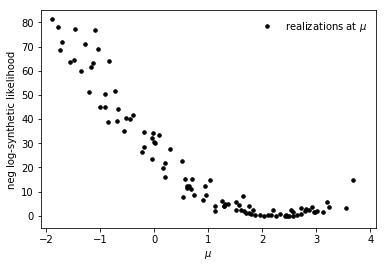

In [7]:
(xmin,xmax)=(-2.1,4.1)
(ymin,ymax)=(-5,85)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.plot(mu_sims, S1_sims, linestyle="", marker="o", markersize=3.5, color="black", label="realizations at $\mu$")
plt.xlabel("$\mu$")
plt.ylabel("neg log-synthetic likelihood")
plt.legend(frameon=False)

## The synthetic likelihood as a stochastic process

In [8]:
def synthetic_likelihood(mu, d0, g, batch_size):
    return 1/2.*np.log(2*np.pi/batch_size) + batch_size/2.*(d0 - mu - g)**2
# this is distance(d0, mu+g)

### One realization

In [9]:
# Get the synthetic likelihood for one particular realization
sigma_g=1/np.sqrt(N*batch_size)
g=ss.norm(0, sigma_g).rvs()
mu_arr=np.linspace(-2,4,100)
l_mu_one_res=synthetic_likelihood(mu_arr, d0, g, batch_size)

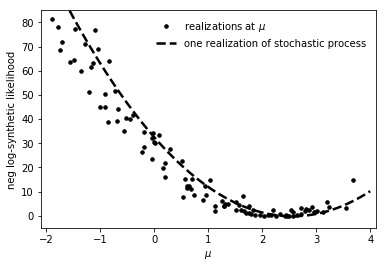

In [10]:
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.plot(mu_sims, S1_sims, linestyle="", marker="o", markersize=3.5, color="black", label="realizations at $\mu$")
plt.plot(mu_arr, l_mu_one_res, linestyle="--", linewidth=2.5, color="black", label="one realization of stochastic process")
plt.xlabel("$\mu$")
plt.ylabel("neg log-synthetic likelihood")
plt.legend(frameon=False)

### Mean and quantiles

In [11]:
g_m=ss.norm(0, sigma_g).ppf(0.1) # g value for the 0.1 quantile
g_p=ss.norm(0, sigma_g).ppf(0.9) # g value for the 0.9 quantile
g_0=ss.norm(0, sigma_g).ppf(0.5) # g value for the mean
l_mu_m=synthetic_likelihood(mu_arr, d0, g_m, batch_size)
l_mu_p=synthetic_likelihood(mu_arr, d0, g_p, batch_size)
l_mu_0=synthetic_likelihood(mu_arr, d0, g_0, batch_size)

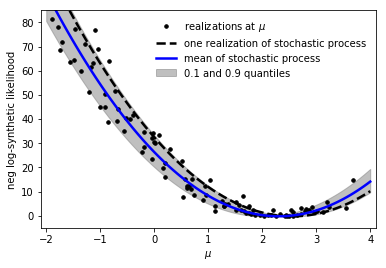

In [12]:
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.plot(mu_sims, S1_sims, linestyle="", marker="o", markersize=3.5, color="black", label="realizations at $\mu$")
plt.plot(mu_arr, l_mu_one_res, linestyle="--", linewidth=2.5, color="black", label="one realization of stochastic process")
plt.plot(mu_arr, l_mu_0, linestyle="-", linewidth=2.5, color="blue", label="mean of stochastic process")
plt.fill_between(mu_arr, l_mu_m, l_mu_p, color="grey", alpha=0.5, label="0.1 and 0.9 quantiles")
plt.xlabel("$\mu$")
plt.ylabel("neg log-synthetic likelihood")
plt.legend(frameon=False)

## Distribution of the maximum synthetic likelihood estimator

In [13]:
def max_synthetic_likelihood(d0, N):
    sigma_g=1/np.sqrt(N*batch_size)
    return ss.norm(d0, sigma_g)

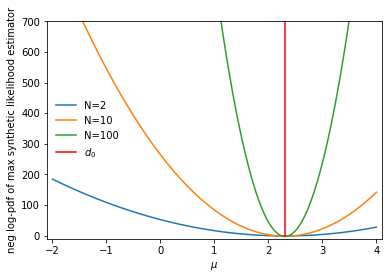

In [14]:
(ymin,ymax)=(-10,700)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.plot(mu_arr, -max_synthetic_likelihood(d0, 2).logpdf(mu_arr), label="N=2")
plt.plot(mu_arr, -max_synthetic_likelihood(d0, 10).logpdf(mu_arr), label="N=10")
plt.plot(mu_arr, -max_synthetic_likelihood(d0, 100).logpdf(mu_arr), label="N=100")
plt.plot([d0,d0],[0,ymax], label="$d_0$", color="red")
plt.xlabel("$\mu$")
plt.ylabel("neg log-pdf of max synthetic likelihood estimator")
plt.legend(frameon=False,loc="best")